Assignment Expectations/Steps -

1. Import and store the data in a data frame.

In [154]:
#%matplotlib inline

#import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [155]:
#air_df=pd.read_csv('./airq402.csv', names=["City1", "City2", "AVG_Fare", "Distance", "AVG_Pansanger", "H_Airline", "H_Mkt_share","H_AVG_Fare", "L_Airline", "L_Mkt_share", "L_price"])

In [172]:
air_df=pd.read_csv('./airq402.csv')

In [173]:
air_df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [175]:
# Renaming the column names because column names are same for multiple columns
air_df.rename(columns={'market leading airline':'Market leading airline',
'market share':'Market share - leading',
'Average fare':'Average fare - leading',
'market share.1':'Market share - low price',
'Price':'Average fare - low price'}, inplace=True)

air_df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,Market leading airline,Market share - leading,Average fare - leading,Low price airline,Market share - low price,Average fare - low price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [176]:
air_df[air_df.isna().any(axis=1)]

,City1,City2,Average Fare,Distance,Average weekly passengers,Market leading airline,Market share - leading,Average fare - leading,Low price airline,Market share - low price,Average fare - low price


In [178]:
# Droping categorical columns

air_df=air_df.drop(['City1', 'City2', 'Market leading airline', 'Low price airline'], axis=1)

2. Remove the outliers from the data 

In [179]:
air_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Market share - leading,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare - leading,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Market share - low price,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Average fare - low price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


<function matplotlib.pyplot.show(close=None, block=None)>

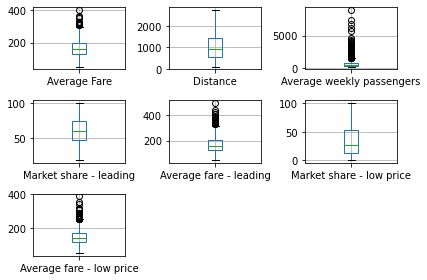

In [180]:
# plotting boxplot to check the outliers

fig, axes = plt.subplots(3,3)# creat figure and axes

for i, el in enumerate (list(air_df.columns.values[:])):
    a=air_df.boxplot(el, ax=axes.flatten()[i])
    
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

plt.tight_layout()
plt.show


To determine whether data contains an outlier:
    Identify the point furthest from the mean of the data.
    Determine whether that point is further than 1.5*IQR away from the mean.
    If so, that point is an outlier and should be eliminated from the data resulting in a new set of data.
    Repeat steps to determine if new data set contains an outlier until dataset no longer contains outlier.
    
    IQR (Interquartile Range) = Third Quartile (Q3)- First Quratile (Q1)
    
    To find an outlier by hand:
Data: [ 53 55 51 50 60 52 ] we will check for outliers.

Sorted: [ 50 51 52 53 55 60 ] where the mean is 53.5 and 60 is the furthest away (60-53.5 > 53.5-50).

1.5 * IQR = 1.5 * (55-51) = 6

Since 60-53.5 = 6.5 > 6, 60 is an outlier.

New Data: [ 53 55 51 50 52 ] we will check for outliers.

New Data Sorted: [ 50 51 52 53 55 ] where the mean is 52.2 and 55 is the furthest away.

1.5* IQR = 1.5 * (54-50.5) = 4.5

Since 55-52.2 = 2.8 < 4.5, 55 is NOT an outlier.

Our original data had one outlier, which was 60.

Example:
Input data = [53 55 51 50 60 52]

Output new_data = [53 55 51 50 52]
    

In [195]:
#Removing the Outliers and assigning it to new dataframe

Q1= air_df.quantile(0.25)
Q3= air_df.quantile(0.75)


IQR=Q3-Q1

air_df_new=air_df[~((air_df < (Q1-1.5*IQR) ) | (air_df > (Q3 + 1.5*IQR))).any(axis=1)]

print (air_df.shape)
print ('Without outlers {}'.format(air_df_new.shape))

air_df_new.describe().T

(1000, 7)
Without outlers (885, 7)


,count,mean,std,min,25%,50%,75%,max
Average Fare,885.0,160.292068,48.468895,50.52,126.60,160.71,194.05,288.58
Distance,885.0,1039.383051,615.224361,108.00,564.00,914.00,1381.00,2724.00
Average weekly passengers,885.0,499.132644,327.573566,181.41,249.02,372.93,644.56,1519.89
Market share - leading,885.0,60.636938,19.361447,17.68,47.02,59.75,74.66,100.00
Average fare - leading,885.0,162.589051,53.288002,50.52,125.59,160.74,198.47,315.86
Market share - low price,885.0,34.373028,27.183305,1.06,13.06,26.25,52.93,100.00
Average fare - low price,885.0,140.431073,39.849789,50.52,115.11,138.02,166.26,250.02


3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table. (3 points)
4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [218]:
X= air_df_new.drop('Average Fare', axis=1)
y= air_df_new[['Average Fare']]



Average Fare    float64
dtype: object

In [197]:
# Finding the correlation Between Dependent Variable and Independent Variable

air_df_corr= air_df_new.corr()
air_df_corr.loc['Average Fare', 'Distance':]

Distance                     0.522650
Average weekly passengers   -0.197005
Market share - leading      -0.207955
Average fare - leading       0.979713
Market share - low price    -0.493555
Average fare - low price     0.840993
Name: Average Fare, dtype: float64

# Scenario 1 - Considering .1 as positive and negative correlation, there is no Independent variables which is between -0.1 and +0.1

In [198]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=1)

regression_model=LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [199]:
print ("Scenario 1: \n")
print (f'Training Score: {regression_model.score(X_train,y_train)}\n')
print (f'Test Score:{regression_model.score(X_test, y_test)}\n')

# Coefficents for each of the indipendent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

# intercepter for the model 

intercept = regression_model.intercept_[0]

print ("\n The Intercept for regression model for Scenario 1 is {}".format(intercept))




Scenario 1: 

Training Score: 0.9709803472467778

Test Score:0.9743445194231669

The coefficient for Distance is 0.0026985879692327875
The coefficient for Average weekly passengers is -0.003672925373594004
The coefficient for Market share - leading is 0.07893130482596344
The coefficient for Average fare - leading is 0.7366228373581054
The coefficient for Market share - low price is -0.028513579082319343
The coefficient for Average fare - low price is 0.22528413482475856

 The Intercept for regression model for Scenario 1 is 3.912425648539795


# Scenario 2 - Considering .1 as only positive correlation

In [200]:
# Average weekly passengers, Market share - leading and Market share - low price has correlation less than .1 
# with dependent Variable
# Copying all independent variables to X 

X=X.drop(['Average weekly passengers','Market share - leading','Market share - low price'], axis=1)

print ('Scenario 2')

print (f"X Shape = {X.shape} y Shape = {y.shape}")

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=1)

regression_model=LinearRegression()
regression_model.fit(X_train, y_train)

Scenario 2
X Shape = (885, 3) y Shape = (885, 1)


LinearRegression()

In [201]:
regression_model.score(X_train, y_train)

0.9695547782563688

#  5. Scatter Plot of Independent Variable vs Dependent Variable.

In [202]:
# pair plot to understand the relation ship between Average Fare and all other column

air_df_attr= air_df_new.iloc[:,0:10]

air_df_attr


,Average Fare,Distance,Average weekly passengers,Market share - leading,Average fare - leading,Market share - low price,Average fare - low price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
...,...,...,...,...,...,...,...
995,136.16,1104,184.34,33.37,135.82,28.65,118.51
996,83.28,200,232.71,99.57,82.55,99.57,82.55
997,159.97,814,843.80,46.19,159.65,13.89,159.02
998,73.57,174,214.45,99.74,73.44,99.74,73.44


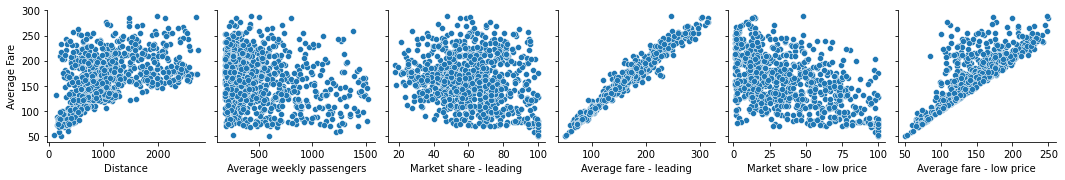

In [205]:
sns.pairplot(air_df_attr, 
             x_vars=['Distance', 'Average weekly passengers','Market share - leading', 
                                  'Average fare - leading', 'Market share - low price' 
                                  ,'Average fare - low price' ], 
             y_vars=['Average Fare'], diag_kind='kde')

 7. Coefficient and Intercept of Linear Model for Scenario 2

In [206]:
# coefficients for each of the independent attributes

for idx, col_name in enumerate (X_train.columns):
    print ("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Distance is 0.0016617876065931519
The coefficient for Average fare - leading is 0.7555063053685087
The coefficient for Average fare - low price is 0.2119699425833675
